# Marvel Cinematic Universe Machine Learning

Import dependencies

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('machine_learning_marvel.csv', index_col='Title')
data.head()

,Year,Captain America,Iron Man,Black Widow,Thor,Hulk,Hawkeye,Nick Fury,Vision,Spider-Man,...,Wanda,Ant-Man,Doctor Strange,Black Panther,Captain Marvel,Runtime,IMDB Rating,IMDB Gross,Tomato Meter,Tomato Audience Score
Title,,,,,,,,,,,,,,,,,,,,,
Iron Man,2008,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,126,7.9,318410000,94,91
Iron Man 2,2010,0,1,1,0,0,0,1,1,1,...,0,0,0,0,0,124,7.0,312430000,72,71
Captain America: The First Avenger,2011,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,124,6.9,176650000,80,74
Thor,2011,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,115,7.0,181030000,77,76
The Avengers,2012,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,143,8.0,623280000,91,91


In [3]:
data.corr()

,Year,Captain America,Iron Man,Black Widow,Thor,Hulk,Hawkeye,Nick Fury,Vision,Spider-Man,...,Wanda,Ant-Man,Doctor Strange,Black Panther,Captain Marvel,Runtime,IMDB Rating,IMDB Gross,Tomato Meter,Tomato Audience Score
Year,1.000000,0.117078,-0.207496,0.090890,0.000000,0.250322,-0.069554,-2.623338e-01,-0.406774,0.294518,...,0.243441,0.302293,0.486881,4.156530e-01,0.405569,0.357744,0.199151,0.426229,0.342652,-0.005437
Captain America,0.117078,1.000000,0.354459,0.638311,0.356348,0.356348,0.376256,3.651484e-01,0.160357,0.260875,...,0.594089,0.043033,-0.059409,2.797155e-01,0.346410,0.476799,0.143524,0.306902,-0.134671,-0.083598
Iron Man,-0.207496,0.354459,1.000000,0.524142,0.225555,0.424043,0.431187,2.773501e-01,0.821020,0.528396,...,0.431187,0.087163,-0.010028,3.268602e-01,0.058471,0.582370,0.379530,0.490887,0.046178,0.231648
Black Widow,0.090890,0.638311,0.524142,1.000000,0.295084,0.497955,0.491952,5.669467e-01,0.497955,0.385758,...,0.717430,0.133631,0.040996,3.786201e-01,0.418330,0.602122,0.304459,0.505520,-0.080126,-0.083327
Thor,0.000000,0.356348,0.225555,0.295084,1.000000,0.580952,0.561011,2.927700e-01,0.161905,0.019920,...,0.328139,-0.069007,0.328139,1.840175e-01,0.123443,0.348318,0.311602,0.348275,-0.201784,0.129504
Hulk,0.250322,0.356348,0.424043,0.497955,0.580952,1.000000,0.328139,2.927700e-01,0.371429,0.019920,...,0.328139,-0.069007,0.328139,1.840175e-01,0.462910,0.518027,0.311602,0.590083,-0.014737,-0.125367
Hawkeye,-0.069554,0.376256,0.431187,0.491952,0.561011,0.328139,1.000000,3.253957e-01,0.328139,0.154983,...,0.482353,0.306786,-0.035294,3.067860e-01,0.205798,0.519036,0.247376,0.370557,0.010080,0.157731
Nick Fury,-0.262334,0.365148,0.277350,0.566947,0.292770,0.292770,0.325396,1.000000e+00,0.292770,0.204124,...,0.325396,-0.235702,0.108465,3.271026e-17,0.316228,0.297940,0.106756,0.241071,-0.139394,-0.089033
Vision,-0.406774,0.160357,0.821020,0.497955,0.161905,0.371429,0.328139,2.927700e-01,1.000000,0.239046,...,0.328139,-0.069007,-0.137607,1.840175e-01,-0.216025,0.276518,0.228256,0.287403,-0.139435,0.138607
Spider-Man,0.294518,0.260875,0.528396,0.385758,0.019920,0.019920,0.154983,2.041241e-01,0.239046,1.000000,...,0.398527,0.240563,0.398527,5.051815e-01,0.161374,0.521907,0.344701,0.388364,0.133969,0.256165


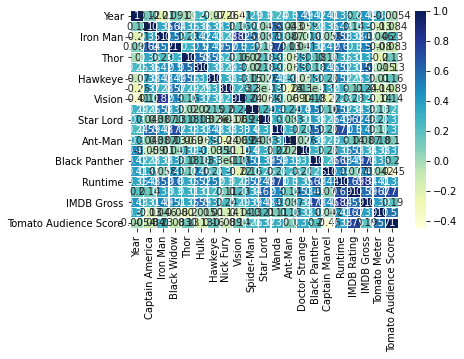

In [4]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2)

In [ ]:
import seaborn as sb
sb.pairplot(data)

In [5]:
train_data = data.sample(frac=0.8, random_state=42)
train_data.index
test_data = data.drop(train_data.index)

In [6]:
train_data.index

Index(['Iron Man', 'Guardians of the Galaxy Vol. 2', 'Guardians of the Galaxy',
       'Iron Man 2', 'Thor: Ragnarok', 'Iron Man Three', 'Captain Marvel',
       'Captain America: Civil War', 'Thor', 'The Avengers',
       'Avengers: Infinity War', 'Doctor Strange', 'Black Panther',
       'Ant-Man and the Wasp', 'Captain America: The First Avenger', 'Ant-Man',
       'Spider-Man: Far from Home', 'Captain America: The Winter Soldier'],
      dtype='object', name='Title')

In [7]:
test_data.index

Index(['Thor: The Dark World', 'Avengers: Age of Ultron',
       'Spider-Man: Homecoming', 'Avengers: Endgame'],
      dtype='object', name='Title')

In [8]:
mcu_vars = train_data[['Year', 'Runtime', 'IMDB Rating', 'IMDB Gross', 'Tomato Meter', 'Tomato Audience Score']]
mcu_vars

,Year,Runtime,IMDB Rating,IMDB Gross,Tomato Meter,Tomato Audience Score
Title,,,,,,
Iron Man,2008,126,7.9,318410000,94,91
Guardians of the Galaxy Vol. 2,2017,136,7.6,389810000,85,87
Guardians of the Galaxy,2014,121,8.0,333180000,92,92
Iron Man 2,2010,124,7.0,312430000,72,71
Thor: Ragnarok,2017,130,7.9,315060000,93,87
Iron Man Three,2013,130,7.1,409010000,79,78
Captain Marvel,2019,123,6.8,426830000,79,45
Captain America: Civil War,2016,147,7.8,408080000,90,89
Thor,2011,115,7.0,181030000,77,76


In [9]:
from sklearn.linear_model import LinearRegression
split_mcu_model = LinearRegression()
split_mcu_model.fit(X = mcu_vars, y = train_data['IMDB Gross'])

LinearRegression()

In [10]:
print('Intercept: ', split_mcu_model.intercept_)
print(' ')
print('Co-efficients: ', split_mcu_model.coef_)
print(' ')

Intercept:  -7.927417755126953e-06
 
Co-efficients:  [ 4.11297019e-09 -4.28787332e-09  2.10673296e-09  1.00000000e+00
 -3.50044230e-10 -1.08499383e-10]
 


In [11]:
test_df = test_data[['Year', 'Runtime', 'IMDB Rating', 'IMDB Gross', 'Tomato Meter', 'Tomato Audience Score']]
test_df

,Year,Runtime,IMDB Rating,IMDB Gross,Tomato Meter,Tomato Audience Score
Title,,,,,,
Thor: The Dark World,2013,112,6.9,206360000,66,75
Avengers: Age of Ultron,2015,141,7.3,459010000,76,83
Spider-Man: Homecoming,2017,133,7.4,334200000,92,87
Avengers: Endgame,2019,181,8.4,858370000,94,90


In [12]:
predictions = split_mcu_model.predict(X=test_df)
print(predictions)

[2.0636e+08 4.5901e+08 3.3420e+08 8.5837e+08]


In [13]:
for i in predictions:
 print('$' + format(i, ',.2f'))

$206,360,000.00
$459,010,000.00
$334,200,000.00
$858,370,000.00


In [15]:
split_mcu_model.score(X = mcu_vars, y = train_data['IMDB Gross'])

1.0

In [16]:
test_data['Projected Gross'] = predictions
test_data

,Year,Captain America,Iron Man,Black Widow,Thor,Hulk,Hawkeye,Nick Fury,Vision,Spider-Man,...,Ant-Man,Doctor Strange,Black Panther,Captain Marvel,Runtime,IMDB Rating,IMDB Gross,Tomato Meter,Tomato Audience Score,Projected Gross
Title,,,,,,,,,,,,,,,,,,,,,
Thor: The Dark World,2013,1,0,0,1,0,0,0,0,0,...,0,0,0,0,112,6.9,206360000,66,75,206360000.0
Avengers: Age of Ultron,2015,1,1,1,1,1,1,1,1,0,...,0,0,0,0,141,7.3,459010000,76,83,459010000.0
Spider-Man: Homecoming,2017,1,1,0,0,0,0,0,0,1,...,0,0,0,0,133,7.4,334200000,92,87,334200000.0
Avengers: Endgame,2019,1,1,1,1,1,1,1,0,1,...,1,1,1,1,181,8.4,858370000,94,90,858370000.0


In [17]:
import matplotlib.ticker as mtick
def scatterplot(df, x_dim, y_dim, z_dim):
    x= df[x_dim]
    y= df[y_dim]
    z= df[z_dim]

    fig, ax = plt.subplots(figsize=(20,16))
    
    #define color array
    colors = ['blue', 'red']

    #customize transparency for each dot in the scatter plot

    #plot each x-y
    ax.scatter(x, y, alpha=0.9, color=colors[0])
    ax.scatter(x, z, alpha=0.9, color=colors[1])

     #add title and axes labels
    ax.set_title('Comparison of Predicted Gross vs IMDB Gross for MCU Movies')
    ax.set_xlabel('IMDB Rating')
    ax.set_ylabel('IMDB Gross (USD)')

     #remove top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

     #add major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    #Change y-axis label style and include Currency format
    ax.ticklabel_format(style='plain', useOffset=False, axis='y')
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)

    #Change x-axis label style and include Currency format
    ax.ticklabel_format(style='plain', useOffset=False, axis='x')
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.xaxis.set_major_formatter(tick)
    plt.xticks(rotation=45)

    #add Legend
    ax.legend()
    
    for i in test_data.index: 
        plt.text(test_data['IMDB Rating'], test_data['Projected Gross'][i]+3000000.0, i)
        plt.text(test_data['IMDB Rating'], test_data['IMDB Gross'][i], i)
        
    plt.show()
 
scatterplot(test_data, 'IMDB Rating', 'IMDB Gross', 'Projected Gross')

No handles with labels found to put in legend.


TypeError: cannot convert the series to <class 'float'>

<Figure size 1440x1152 with 1 Axes>